# Confidence Intervals    
by Emily Anderson   

## Table of Contents

 <p><div class="lev1 toc-item"><a href="#Standard-confidence-intervals-for-normal-distribution" data-toc-modified-id="Standard-confidence-intervals-for-normal-distribution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Standard confidence intervals for normal distribution</a></div><div class="lev1 toc-item"><a href="#Bootstrapped-confidence-intervals" data-toc-modified-id="Bootstrapped-confidence-intervals-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bootstrapped confidence intervals</a></div><div class="lev1 toc-item"><a href="#Bayesian-estimates" data-toc-modified-id="Bayesian-estimates-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bayesian estimates</a></div>

In [1]:
import math
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib notebook

VERBOSE = True

This function is just for my reference

In [2]:
def phi(x,mu=0,sigma=1):
    """ Cumulative distribution function for normal distribution """
    return (1.0 + math.erf((x - mu)/ (sigma*math.sqrt(2.0)))) / 2.0


Some parameters for playing with confidence intervals

In [3]:
mu = 500
std = 15
sample_size=100
alpha = 0.05

# Standard confidence intervals for normal distribution

Here, I've gone ahead and created my own confidence_interval function for pedagological purposes

In [4]:
def confidence_interval(mu,std,sample_size,critical_val=1.96):
    """Compute a confidence interval for a normal distribution. If population sigma (standard deviation) is known,
    then the critical_val should be the z_score. Otherwise, critical_val should use Student's t distribution to 
    calculate the interval. (t is z as sample size approaches infinity; when sample_size >= 30, people often use Z
    rather than t) """
    interval = critical_val*(std/math.sqrt(sample_size))
    if VERBOSE:
        print(round(mu - critical_val*(std/math.sqrt(sample_size)),2),round(mu + critical_val*(std/math.sqrt(sample_size)),2))
    return mu-interval,mu+interval
        


In [5]:
confidence_interval(mu=mu,std=std,sample_size=sample_size,critical_val=1.96)


497.06 502.94


(497.06, 502.94)

This confidence interval is built into the scipy.stats package

In [6]:
stats.norm.interval(alpha, loc=mu, scale=std/math.sqrt(100))

(499.9059398330852, 500.0940601669148)

# Bootstrapped confidence intervals

Here, I'll be calculating the basic bootstrap, but there are other methods to consider.
See https://en.wikipedia.org/wiki/Bootstrapping_(statistics)#Methods_for_bootstrap_confidence_intervals

okay, now we actually need a full sample, rather than just sample parameters

In [7]:
sample = np.random.normal(loc=mu, scale=std, size=sample_size)
if VERBOSE: print (np.mean(sample),np.std(sample))

501.610832001 13.89028112


First, we resample the distribution.

In [8]:
repeats = 100 #not sure how to choose the number of bootstrapping steps

means = []
stds = []
for r in range(repeats):
    boot = np.random.choice(sample,sample_size,replace=True) #bootstrapping draws with replacement
    means.append(np.mean(boot))
    stds.append(np.std(boot))
if VERBOSE: print(np.mean(means),np.mean(stds))


501.644671043 13.8784181426


Next, we compute the quantiles that correspond to the confidence intervals we want. Here, we'll calculate confidence intervals for the estimate of our mean.

In [9]:
#to compute the confidence interval, one simply takes the empirical quantiles from the bootstrap distribution of the parameter
confi = np.percentile(means,[(alpha/2)*100,(1-(alpha/2))*100])
if VERBOSE: print (confi)

[ 498.2925181   504.40913121]


In [10]:
#This is essentially the logical behind percentile, although the built-in function uses interpolation
#again, this is just for learning purposes
means = sorted(means)
start = int(math.floor((alpha/2)*sample_size))
finish = int(math.ceil((1-(alpha/2))*sample_size))
if VERBOSE: print (means[start],means[finish])

498.283808682 504.564949685


<IPython.core.display.Javascript object>


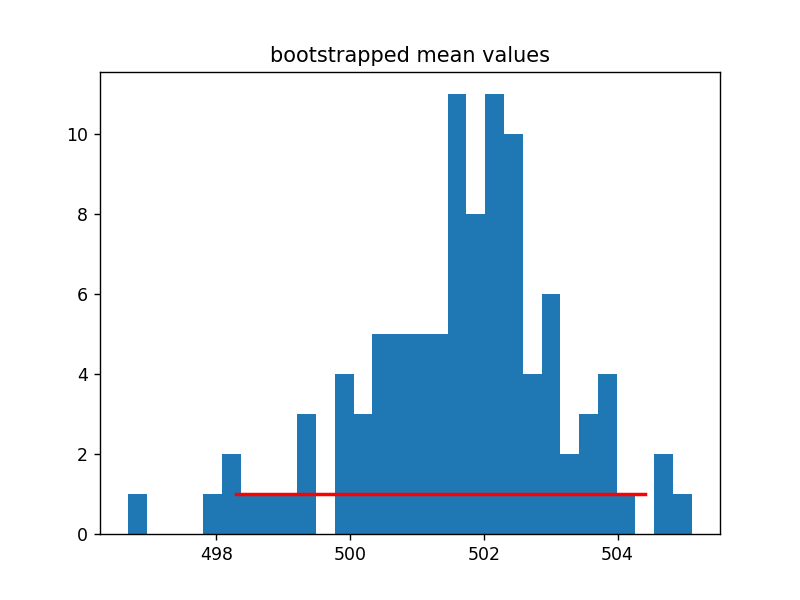

In [11]:
def plot_confidence_interval_histogram(dist, myrange,bins=30):
    fig,ax = plt.subplots()
    ax.hist(dist,bins)
    #ax.axhline(y=1,xmin=myrange[0],xmax=myrange[1],color='r',linewidth=4)
    plt.plot([myrange[0], myrange[1]], [1, 1],color='r',linewidth=2)
    plt.show()
    
plot_confidence_interval_histogram(means,confi)
plt.title('bootstrapped mean values')


<IPython.core.display.Javascript object>


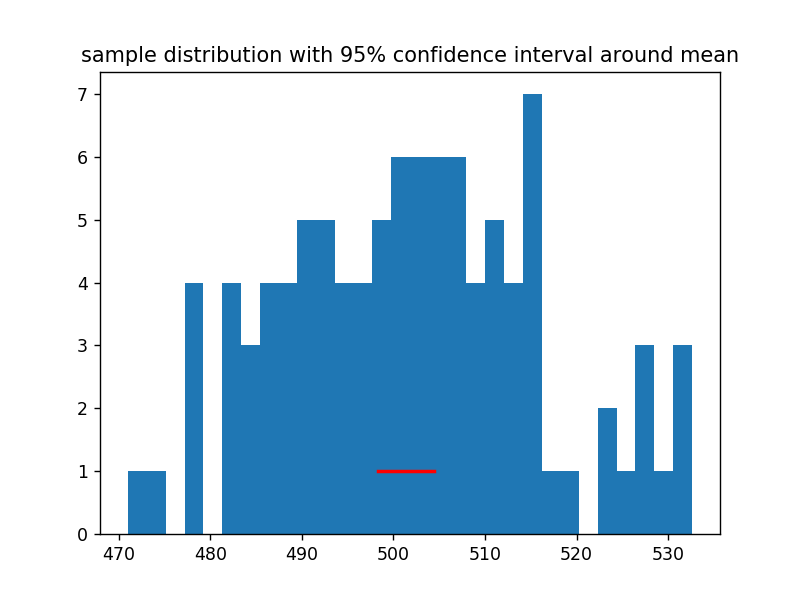

In [12]:
plot_confidence_interval_histogram(sample,confi)
plt.title('sample distribution with 95% confidence interval around mean')


# Bayesian estimates

Information about how the Bayesian interval is calculated by scipy: http://scholarsarchive.byu.edu/facpub/278/
The model prior is appropriately non-informative (Jeffery's prior), but I haven't carefully read about the appropriate usage,
except that it makes the frequent assumption that all data has the same mean and variance.

In [13]:
stats.bayes_mvs(sample, alpha=alpha)

(Mean(statistic=501.6108320011233, minmax=(501.52306951058137, 501.69859449166523)),
 Variance(statistic=198.90712329114456, minmax=(194.46519376252789, 197.97264565986478)),
 Std_dev(statistic=14.067142029709027, minmax=(13.945077761078561, 14.07027525174489)))